In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

In [2]:
abs_path = '/scratch/aew492/research-summer2020_output/'
mock_path = os.path.join(abs_path, 'gradient/1D/mock_data')

In [3]:
# mock parameters
rlz = 0
cat_tag = 'L750_n1e-4_z057_patchy_As2x'

## binned estimators

In [4]:
nbins = 22
nmocks = 400

xis = np.empty((3, nmocks, nbins))

for i in range(nmocks):
    # lognormal
    r_ln, xis[0, i] = np.load(os.path.join(abs_path, f'lognormal/xi/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_lognormal.npy'), allow_pickle=True)
    # gradient
    r_m0, xis[1, i] = np.load(os.path.join(abs_path, f'gradient/1D/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_m-0.000-L_b-0.500.npy'), allow_pickle=True)
    r_m1, xis[2, i] = np.load(os.path.join(abs_path, f'gradient/1D/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_m-1.000-L_b-0.500.npy'), allow_pickle=True)

In [6]:
# averages
xis_avg = np.mean(xis, axis=1)

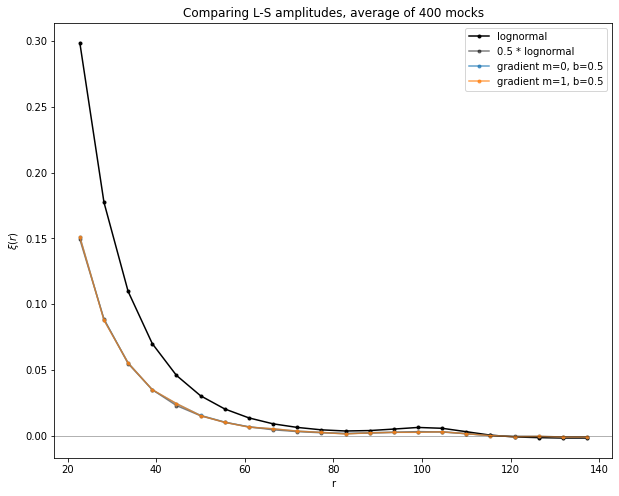

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

alpha = 0.7

ax.plot(r_ln, xis_avg[0], 'k.-', label='lognormal')
ax.plot(r_ln, 0.5*xis_avg[0], 'k.-', alpha=0.5, label='0.5 * lognormal')
ax.plot(r_m0, xis_avg[1], 'C0.-', alpha=alpha, label='gradient m=0, b=0.5')
ax.plot(r_m1, xis_avg[2], 'C1.-', alpha=alpha, label='gradient m=1, b=0.5')

ax.axhline(0, lw=1, color='k', alpha=0.3)
ax.set_xlabel('r')
ax.set_ylabel(r'$\xi(r)$')
ax.set_title(f'Comparing L-S amplitudes, average of {nmocks} mocks')
plt.legend()

If $\xi_{\mathrm{grad}} = \overline{f}_c^2 \xi_{\mathrm{DD}}$ then we have $\overline{f}_c^2 = \frac{1}{2} \Rightarrow \overline{f}_c = \sqrt{\frac{1}{2}} = \sqrt{\eta_0}$, where $\eta_0 \equiv b$

In [11]:
ratio = 0.5
ratio_emp_m0 = xis_avg[1] / xis_avg[0]
ratio_emp_m1 = xis_avg[2] / xis_avg[0]
ratio_emp_m0, ratio_emp_m1

(array([0.50624678, 0.49672199, 0.50531914, 0.49831454, 0.53092079,
        0.50901433, 0.50917223, 0.48690168, 0.57437372, 0.55219811,
        0.57106526, 0.39383905, 0.5982539 , 0.52709278, 0.42180663,
        0.53849463, 0.50319873, 0.19741634, 0.69175971, 0.32388953,
        0.53588885, 0.48101358]),
 array([0.50545088, 0.49524701, 0.50396879, 0.49949852, 0.5329978 ,
        0.5028822 , 0.50126084, 0.48260617, 0.58396656, 0.55405758,
        0.56008019, 0.36135388, 0.56789289, 0.51075523, 0.412661  ,
        0.52856192, 0.49813393, 0.19381872, 0.77306468, 0.33511279,
        0.54801693, 0.53306287]))

In [21]:
rbin = 18
xis_avg[0, rbin], xis_avg[1, rbin], xis_avg[2, rbin]

(-0.0009173336151985659, -0.0006345744381800615, -0.0007091582197199133)

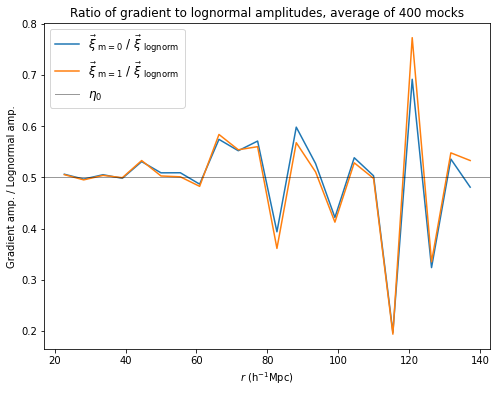

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(r_ln, ratio_emp_m0, label=r'$\vec{\xi}_{\ \mathrm{m=0}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.plot(r_ln, ratio_emp_m1, label=r'$\vec{\xi}_{\ \mathrm{m=1}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.axhline(ratio, lw=1, color='k', alpha=0.4, label='$\eta_0$')

ax.set_xlabel('$r$ (h$^{-1}$Mpc)')
ax.set_ylabel('Gradient amp. / Lognormal amp.')
ax.set_title(f'Ratio of gradient to lognormal amplitudes, average of {nmocks} mocks')

ax.legend(prop={'size': 12})

Similarity of the spikes suggests that they result from the initial lognormal mock as opposed to gradient injection.

## threshold visualisation

$ \tau(\mathbf{x})=\sqrt{\mathbf{\omega}\cdot\mathbf{x}+\eta_0} $

$ \tau(x) = \sqrt{mx+\eta_0} $ in one dimension

In [13]:
L = 750
x = np.linspace(-L/2, L/2, 100)
def tau(x, m, b=0.5):
    tau = np.sqrt(m*x + b)
    return tau

Text(0.5, 1.0, 'Threshold $\\tau(\\mathbf{x})=\\sqrt{\\mathbf{\\omega}\\cdot\\mathbf{x}+\\eta_0}$, $\\mathbf{\\omega}=[1.0, 0, 0]$')

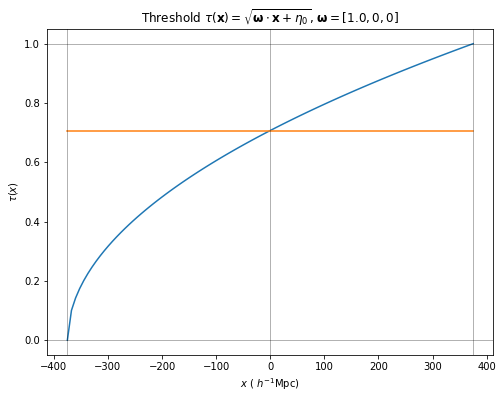

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, tau(x,1/L))
ax.plot(x, tau(x,0))

for xval in [0, -L/2, L/2]:
    ax.axvline(xval, color='k', alpha=0.3, lw=1)
for yval in [0,1]:
    ax.axhline(yval, color='k', alpha=0.3, lw=1)
ax.set_xlabel(r'$x$ ( $h^{-1}$Mpc)')
ax.set_ylabel(r'$\tau(x)$')
ax.set_title(r'Threshold $\tau(\mathbf{x})=\sqrt{\mathbf{\omega}\cdot\mathbf{x}+\eta_0}$, $\mathbf{\omega}=[1.0, 0, 0]$')

empirically, we are finding that the fraction of clustered points in the gradient catalog matches the average value of the threshold across the box!

In [16]:
ms = [0, 1]
b = 0.5
rlz = 0

In [17]:
mock_dicts = [np.load(os.path.join(mock_path, f'{cat_tag}/{cat_tag}_rlz{rlz}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item() for m in ms]

N_C_m0, N_C_m1 = [len(info['clust_set']) for info in mock_dicts]
N_grad_m0, N_grad_m1 = [len(info['grad_set']) for info in mock_dicts]
N_ln_m0, N_ln_m1 = [info['N'] for info in mock_dicts]

Expectation with $m=0$ is that $f_c = \sqrt{\eta_0} \Rightarrow \frac{1}{\sqrt{2}}$ when $\eta_0 = 1/2$

In [18]:
N_C_m0 / N_grad_m0

0.7052782201297053

Expectation with $m=1$ is that $f_c = \frac{2}{3}$ when $\eta_0 = 1/2$

In [19]:
N_C_m1 / N_grad_m1

0.6651646447140381